# Algorithm 1

In [ ]:
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2

# construct the argument parse and parse the arguments


# load the image, convert it to grayscale, and blur it
image = cv2.imread("C:\\Users\\swayt\\Downloads\\Training (1) (extract.me)\\Training\\arm_12.png")
image=cv2.resize(image,(800,615))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.bilateralFilter(gray,9,75,75)
median=cv2.medianBlur(blur,5)


#cv2.imshow("median",median)

#cv2.imshow()

# threshold the image to reveal light regions in the
# blurred image
thresh = cv2.threshold(median, 155, 255, cv2.THRESH_BINARY)[1]
# perform a series of erosions and dilations to remove
# any small blobs of noise from the thresholded image
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)

# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue

	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)

	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels >300:
		mask = cv2.add(mask, labelMask)

# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
# loop over the contours
for (i, c) in enumerate(cnts):
     ellipse = cv2.fitEllipse(c)
     (x, y, w, h) = cv2.boundingRect(c)
     cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
                 cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
     cv2.ellipse(image,ellipse,(0,255,0),2)
          
     print(h)
     print(w)
     print(x)
     print(y)
     break
	# draw the bright spot on the image
	
cv2.imshow("Image", image)
cv2.imshow("Image", mask)
cv2.waitKey(0)

c:\users\swayt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:34: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


46
24
282
222


# Algorithm 2

In [ ]:
import numpy as np
import argparse
import cv2

# load the image and convert it to grayscale
image = cv2.imread("C:\\Users\\swayt\\Downloads\\Training (1) (extract.me)\\Training\\arm_16.png")

orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# the area of the image with the largest intensity value
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
cv2.circle(image, maxLoc, 5, (255, 0, 0), 2)

# cv2.namedWindow("Naive", cv2.WINDOW_NORMAL)
# display the results of the naive attempt
# cv2.imshow("Naive", image)

# apply a Gaussian blur to the image then find the brightest
# region
gray = cv2.GaussianBlur(gray, (141, 141), 0)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
image = orig.copy()
# actual 141 Robust method
cv2.circle(image, maxLoc, 31, (255, 0, 0), 2)
cv2.circle(image,maxLoc,1,(0,0,255),3)
#cv2.namedWindow("Robust", cv2.WINDOW_NORMAL) 
# display the results of our newly improved method
#cv2.imshow("Robust", image)
# masking
mask=np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, maxLoc, 21, 255, -1)
cv2.circle(mask,maxLoc,1,255,-1)
cv2.namedWindow("Mask", cv2.WINDOW_NORMAL)
# display the results of our mask
cv2.imshow("Mask", mask)
cv2.waitKey(0)

# Algorithm 3

107.50930933740793


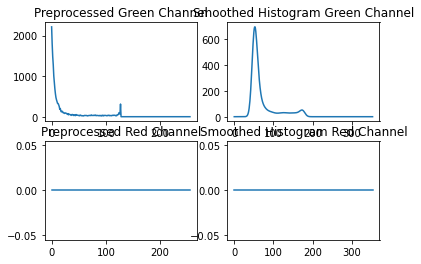

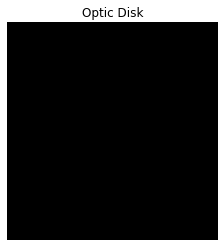

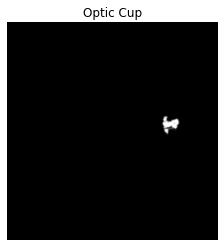

In [2]:
from scipy import signal
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data

image = cv2.imread("C:\\Users\\swayt\\Downloads\\DRIVE\\DRIVE\\DRIVE\\test\\test\\images\\01_test.tif",1)

#----------------------------PRE-PROCESSING AND SMOOTHING---------------------------------

Abo,Ago,Aro = cv2.split(image)  #splitting into 3 channels

#glcm = greycomatrix(Aro, [3], [0])
#stats = greycoprops(glcm)
#par1 = stats(1,1)

Ar = Aro - Aro.mean()           #Preprocessing Red
Ar = Ar - Ar.mean() - Aro.std() #Preprocessing Red
Ar = Ar - Ar.mean() - Aro.std() #Preprocessing Red

Mr = Ar.mean()                           #Mean of preprocessed red
SDr = Ar.std()                           #SD of preprocessed red
# Thr = 49.5 - 12 - Ar.std()               #OD Threshold
Thr = Ar.std()
print (Thr)

Ag = Ago - Ago.mean()           #Preprocessing Green
Ag = Ag - Ag.mean() - Ago.std() #Preprocessing Green

Mg = Ag.mean()                           #Mean of preprocessed green
SDg = Ag.std()                           #SD of preprocessed green
Thg = Ag.mean() + 2*Ag.std() + 49.5 + 12 #OC Threshold

filter = signal.gaussian(99, std=6) #Gaussian Window
filter=filter/sum(filter)

hist,bins = np.histogram(Ag.ravel(),256,[0,256])   #Histogram of preprocessed green channel
histr,binsr = np.histogram(Ar.ravel(),256,[0,256]) #Histogram of preprocessed red channel

smooth_hist_g=np.convolve(filter,hist)  #Histogram Smoothing Green
smooth_hist_r=np.convolve(filter,histr) #Histogram Smoothing Red

plt.subplot(2, 2, 1)
plt.plot(hist)
plt.title("Preprocessed Green Channel")

plt.subplot(2, 2, 2)
plt.plot(smooth_hist_g)
plt.title("Smoothed Histogram Green Channel")

plt.subplot(2, 2, 3)
plt.plot(histr)
plt.title("Preprocessed Red Channel")

plt.subplot(2, 2, 4)
plt.plot(smooth_hist_r)
plt.title("Smoothed Histogram Red Channel")

plt.show()

#---------------------------------APPLYING THRESHOLD--------------------------------------

r,c = Ag.shape
Dd = np.zeros(shape=(r,c))
Dc = np.zeros(shape=(r,c))

for i in range(1,r):
    for j in range(1,c):
        if Ar[i,j]>Thr:
            Dd[i,j]=255
        else:
            Dd[i,j]=0

for i in range(1,r):
    for j in range(1,c):
        if Ag[i,j]>Thg:
            Dc[i,j]=1
        else:
            Dc[i,j]=0

#----------SELECTING LARGEST AREA AND PERFORMING MORPHOLOGY TO FIND EXACT CUP-------------
#L1=cv2.connectedComponents(Dd,


#------------------------DISPLAYING SEGMENTED OPTIC DISK AND CUP--------------------------

plt.imshow(Dd, cmap = 'gray', interpolation = 'bicubic')
plt.axis("off")
plt.title("Optic Disk")
plt.show()

plt.imshow(Dc, cmap = 'gray', interpolation = 'bicubic')
plt.axis("off")
plt.title("Optic Cup")
plt.show()  

# Algorithm 4

In [1]:
import numpy as np
import argparse
import cv2

# load the image and convert it to grayscale
image = cv2.imread("C:\\Users\\swayt\\Downloads\\Training (1) (extract.me)\\Training\\arm_16.png")

orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# the area of the image with the largest intensity value
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
cv2.circle(image, maxLoc, 5, (255, 0, 0), 2)

# cv2.namedWindow("Naive", cv2.WINDOW_NORMAL)
# display the results of the naive attempt
# cv2.imshow("Naive", image)

# apply a Gaussian blur to the image then find the brightest
# region
gray = cv2.GaussianBlur(gray, (141, 141), 0)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
image = orig.copy()
# actual 141 Robust method
cv2.circle(image, maxLoc, 31, (255, 0, 0), 2)
cv2.circle(image,maxLoc,1,(0,0,255),3)
#cv2.namedWindow("Robust", cv2.WINDOW_NORMAL) 
# display the results of our newly improved method
#cv2.imshow("Robust", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## (2) Threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## (3) Find the min-area contour
cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
cnts = sorted(cnts, key=cv2.contourArea)
for cnt in cnts:
    if cv2.contourArea(cnt) > 100:
        break

## (4) Create mask and do bitwise-op
mask = np.zeros(image.shape[:2],np.uint8)
cv2.drawContours(mask, [cnt],-1, 255, -1)
dst = cv2.bitwise_and(image, image, mask=mask)

## Save it
#cv2.imwrite("dst.png", dst)
cv2.imshow("res",dst)